In [40]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Providing the absolute path to the Excel file
input_file_path = '/Users/namanparuthi/Desktop/Amex/round 2/Amex Campus Challenge 2024 input.xlsx'
sheet_name = 'batsman_scorecard'

df = pd.read_excel(input_file_path, sheet_name=sheet_name)

In [41]:
# Calculating total runs, total balls, number of innings, 100s, and 50s for each batsman
batsman_stats = df.groupby('batsman_id').agg(
    total_runs=pd.NamedAgg(column='runs', aggfunc='sum'),
    innings=pd.NamedAgg(column='batsman_id', aggfunc='count'),
    hundreds=pd.NamedAgg(column='runs', aggfunc=lambda x: (x >= 100).sum()),
    fifties=pd.NamedAgg(column='runs', aggfunc=lambda x: ((x >= 50) & (x < 100)).sum()),
    strike_rate=pd.NamedAgg(column='strike_rate', aggfunc='mean')
).reset_index()

#Selecting eligible batsmen
eligible_batsmen = batsman_stats[batsman_stats['total_runs'] > 100]

# Calculating average
eligible_batsmen['average'] = eligible_batsmen['total_runs'] / eligible_batsmen['innings']


/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/3764177638.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_batsmen['average'] = eligible_batsmen['total_runs'] / eligible_batsmen['innings']


In [42]:
#Defining functions to assing points
def assign_strike_rate_points(sr):
    if sr >= 150:
        return 50
    elif sr >= 100:
        return 40
    elif sr >= 80:
        return 30
    else:
        return 0

def assign_average_points(avg):
    if avg >= 50:
        return 30
    elif avg >= 40:
        return 20
    elif avg >= 30:
        return 10
    else:
        return 5

def assign_hundreds_points(hundreds):
    if hundreds >= 3:
        return 30
    elif hundreds == 2:
        return 20
    elif hundreds == 1:
        return 10
    else:
        return 0

def assign_fifties_points(fifties):
    if fifties >= 5:
        return 20
    elif fifties >= 3:
        return 10
    elif fifties >= 1:
        return 5
    else:
        return 0

# Applying the point assigning functions
eligible_batsmen['strike_rate_points'] = eligible_batsmen['strike_rate'].apply(assign_strike_rate_points)
eligible_batsmen['average_points'] = eligible_batsmen['average'].apply(assign_average_points)
eligible_batsmen['hundreds_points'] = eligible_batsmen['hundreds'].apply(assign_hundreds_points)
eligible_batsmen['fifties_points'] = eligible_batsmen['fifties'].apply(assign_fifties_points)

# Calculating the total points
eligible_batsmen['total_points'] = (eligible_batsmen['strike_rate_points'] + 
                                    eligible_batsmen['average_points'] + 
                                    eligible_batsmen['hundreds_points'] + 
                                    eligible_batsmen['fifties_points'])

/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/491594036.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_batsmen['strike_rate_points'] = eligible_batsmen['strike_rate'].apply(assign_strike_rate_points)
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/491594036.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  eligible_batsmen['average_points'] = eligible_batsmen['average'].apply(assign_average_points)
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykern

In [43]:
# Sorting by total points in descending order
top_batsmen = eligible_batsmen.sort_values(by='total_points', ascending=False)

# Extracting the top ten batsmen
top_ten_batsmen = top_batsmen.head(10)

# Displaying the top ten batsmen
top_ten_batsmen

,batsman_id,total_runs,innings,hundreds,fifties,strike_rate,average,strike_rate_points,average_points,hundreds_points,fifties_points,total_points
574,3125562,2551,80,4,19,136.978500,31.887500,40,10,30,20,100
84,313809,2798,84,3,20,114.388095,33.309524,40,10,30,20,100
304,2162782,3498,97,6,26,123.307835,36.061856,40,10,30,20,100
337,2263736,4031,92,2,38,115.673261,43.815217,40,20,20,20,100
1392,7491224,1983,56,4,9,123.351250,35.410714,40,10,30,20,100
341,2275195,2480,95,3,14,126.458211,26.105263,40,5,30,20,95
197,1749075,3203,112,3,20,130.018214,28.598214,40,5,30,20,95
330,2231928,1888,74,3,11,132.507568,25.513514,40,5,30,20,95
962,4635658,1796,63,3,10,124.756984,28.507937,40,5,30,20,95
476,2789646,283,5,1,1,166.772000,56.600000,50,30,10,5,95


In [44]:
#Defining consistency and recency functions
def weighted_mean(scores):
    weights = np.arange(1, len(scores) + 1)
    return np.average(scores, weights=weights)

def consistency(scores):
    return np.std(scores)

In [45]:
#Applying the functions to dataframe
worked_stats = df.groupby('batsman_id').agg(
    weighted_mean_score=pd.NamedAgg(column='runs', aggfunc=weighted_mean),
    consistency_score=pd.NamedAgg(column='runs', aggfunc=consistency)
).reset_index()

In [46]:
#Applying to the eligble batsmen
final_stats = eligible_batsmen.merge(worked_stats, on='batsman_id')



In [47]:
# Calculating the normalized consistency score
final_stats['normalized_consistency_score'] = 1 / (1 + final_stats['consistency_score'])


In [48]:
final_stats['final_score'] = (final_stats['total_points'] + 
                              final_stats['weighted_mean_score'] + 
                              final_stats['normalized_consistency_score'] * 100)

In [49]:
decending_batsmen = final_stats.sort_values(by='final_score', ascending=False)


In [50]:
# Sorting by total points in descending order
top_batsmen = eligible_batsmen.sort_values(by='total_points', ascending=False)

# Extracting the top ten batsmen
topten_batsmen = decending_batsmen.head(10)


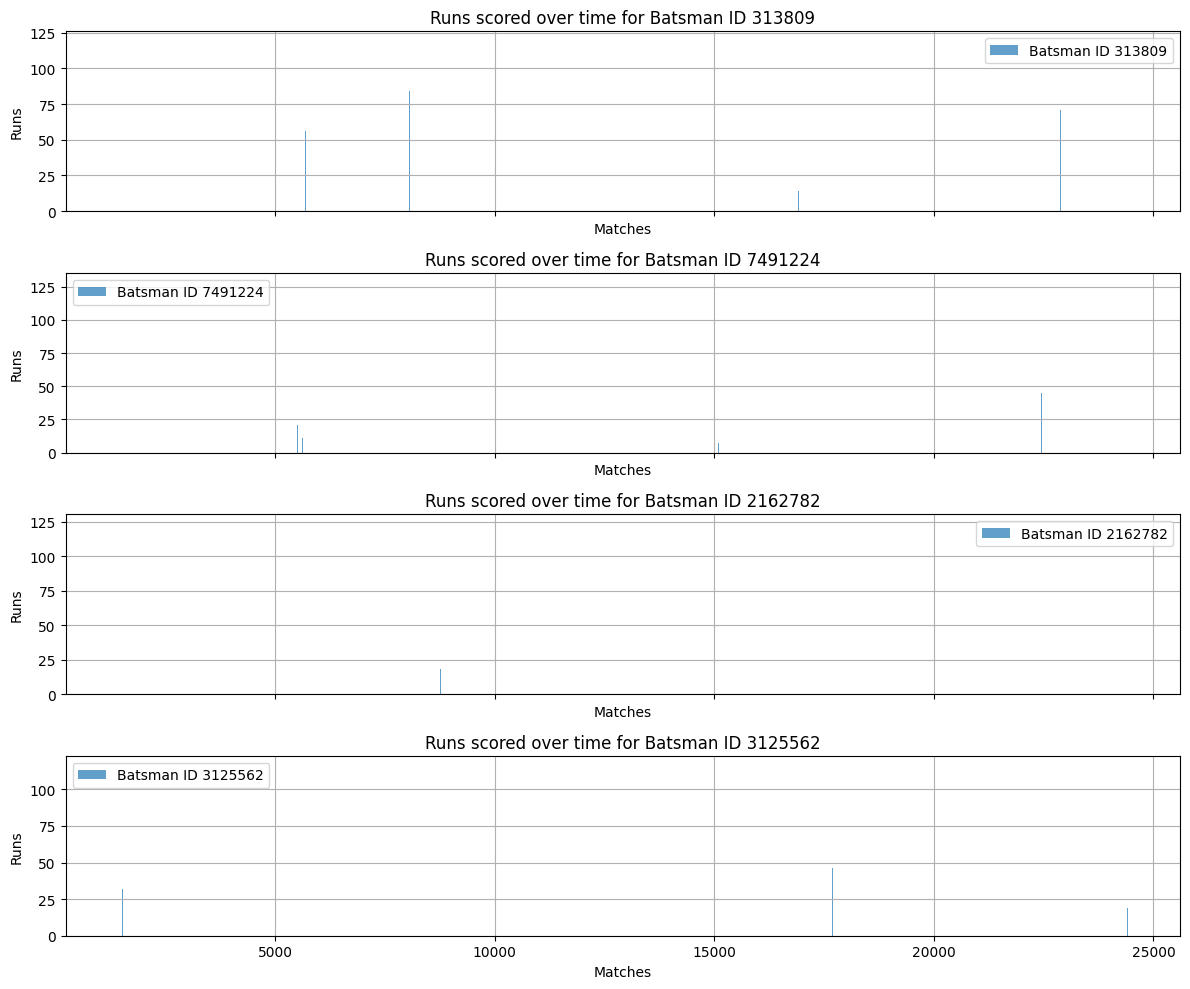

In [57]:
# Importing necessary libraries
import matplotlib.pyplot as plt

# List of batsman IDs
batsman_ids = [313809, 7491224, 2162782, 3125562]

# Create separate bar plots for each batsman ID
fig, axs = plt.subplots(nrows=len(batsman_ids), figsize=(12, 10), sharex=True)

# Plotting each batsman's runs over time
for i, batsman_id in enumerate(batsman_ids):
    batsman_data = df[df['batsman_id'] == batsman_id]
    axs[i].bar(batsman_data.index, batsman_data['runs'], label=f'Batsman ID {batsman_id}', alpha=0.7)
    axs[i].set_xlabel('Matches')
    axs[i].set_ylabel('Runs')
    axs[i].set_title(f'Runs scored over time for Batsman ID {batsman_id}')
    axs[i].legend()
    axs[i].grid(True)

plt.tight_layout()
plt.show()


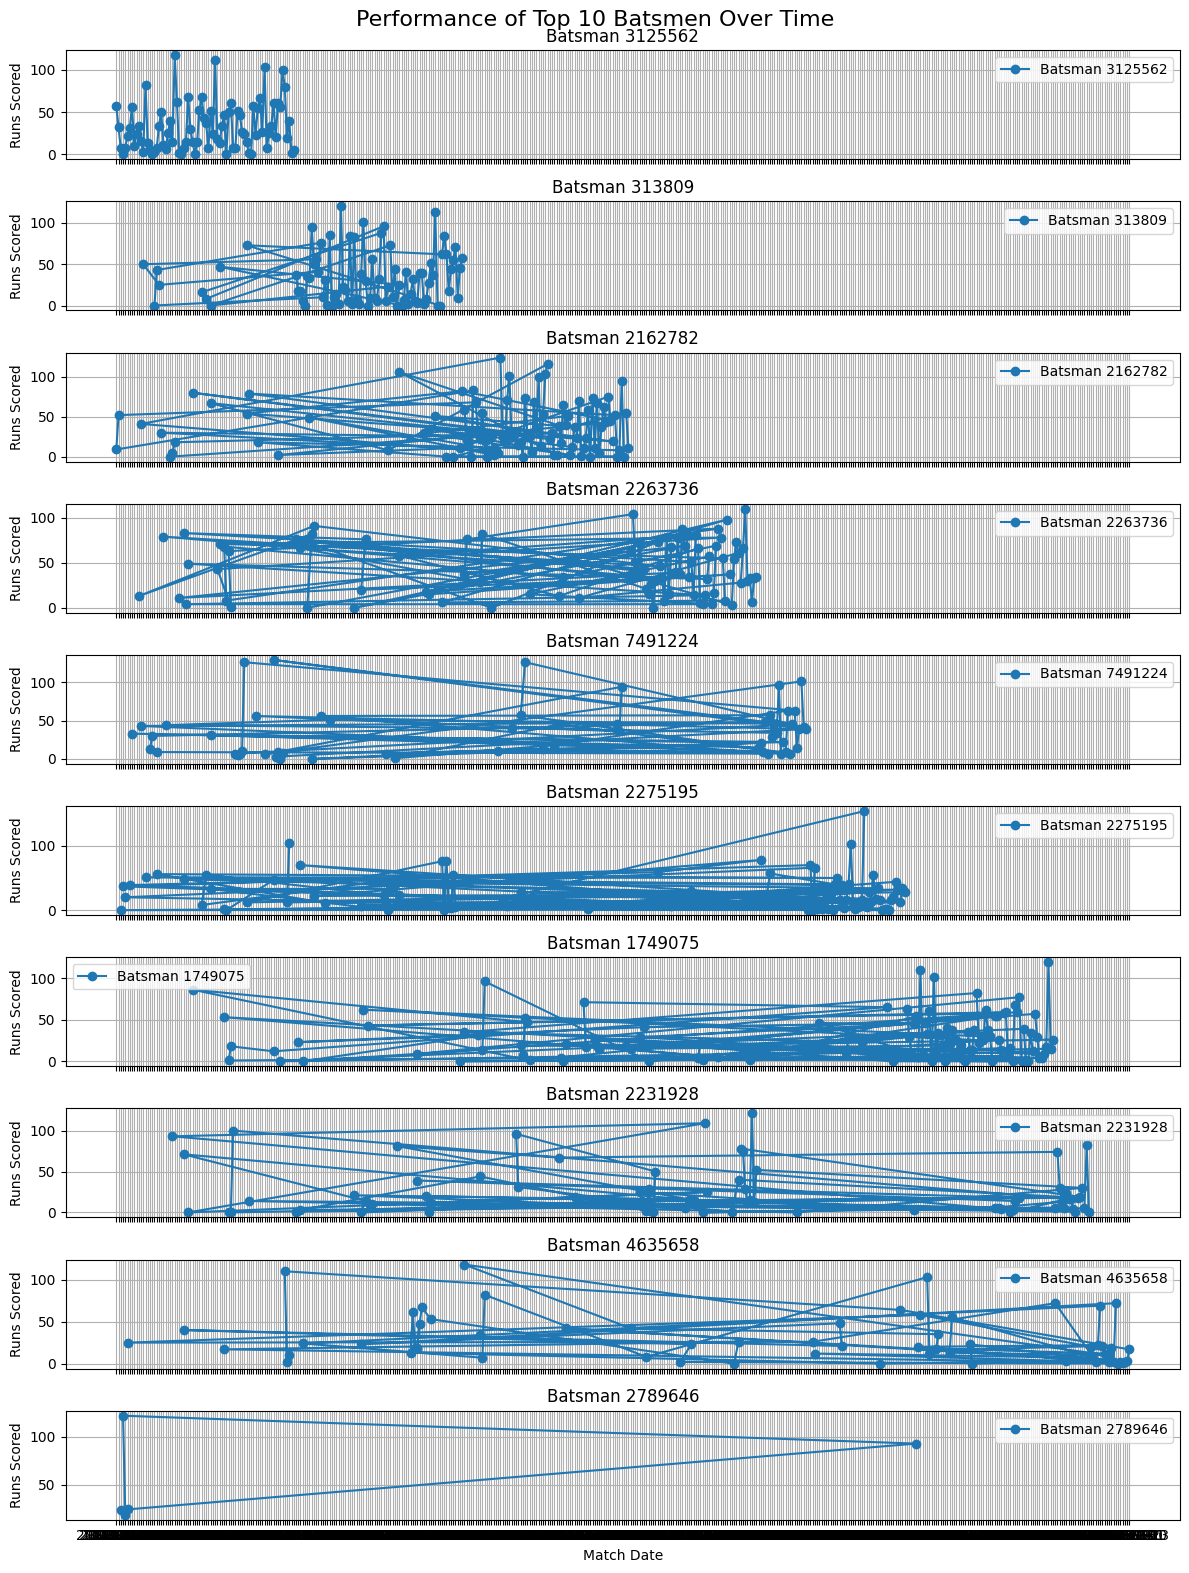

In [61]:
import matplotlib.pyplot as plt

# Filter for the top 10 batsmen
top_batsman_time_series = df[df['batsman_id'].isin(top_ten_batsmen['batsman_id'])]

# Create separate subplots for each batsman
fig, axs = plt.subplots(nrows=len(top_ten_batsmen), figsize=(12, 16), sharex=True)

# Plotting each batsman's runs over time
for i, batsman_id in enumerate(top_ten_batsmen['batsman_id']):
    batsman_data = top_batsman_time_series[top_batsman_time_series['batsman_id'] == batsman_id]
    axs[i].plot(batsman_data['match_dt'], batsman_data['runs'], marker='o', linestyle='-', label=f'Batsman {batsman_id}')
    axs[i].set_ylabel('Runs Scored')
    axs[i].set_title(f'Batsman {batsman_id}')
    axs[i].grid(True)
    axs[i].legend()

# Common X-axis label and title
fig.suptitle('Performance of Top 10 Batsmen Over Time', fontsize=16)
plt.xlabel('Match Date')

plt.tight_layout()
plt.show()


In [ ]:
pip install joypy


[notice] A new release of pip is available: 23.2.1 -> 24.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/4120160087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/4120160087.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/4120160087.py:7: SettingWithCopyWarning

<Figure size 1200x800 with 0 Axes>

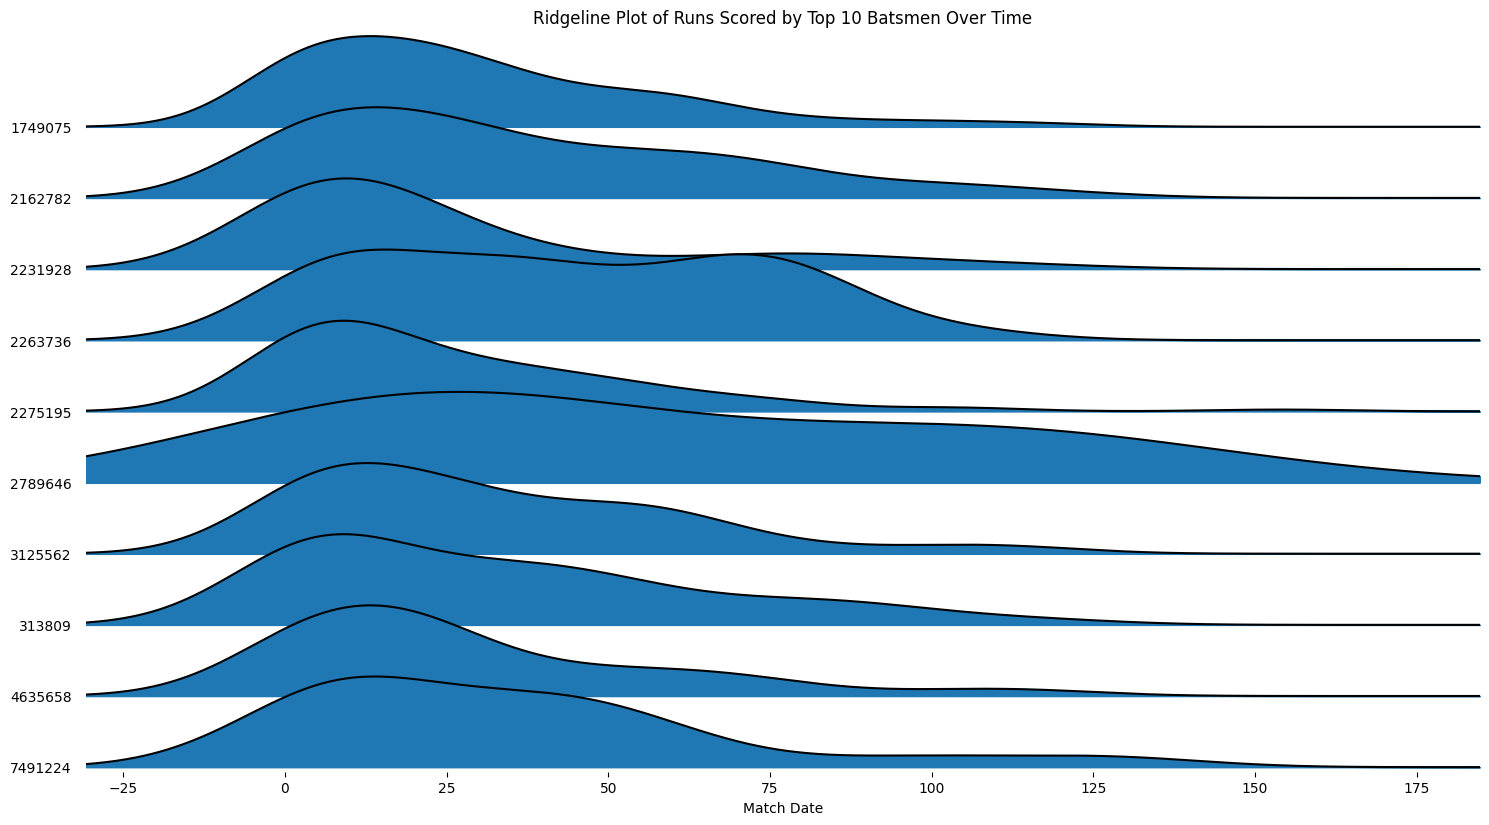

In [ ]:
import joypy

# Prepare data for joyplot
joy_data = []
for batsman_id in top_ten_batsmen['batsman_id']:
    batsman_data = top_batsman_time_series[top_batsman_time_series['batsman_id'] == batsman_id]
    batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
    joy_data.append(batsman_data[['match_dt', 'runs', 'batsman_id']])

# Concatenate all batsman data
joy_data = pd.concat(joy_data)

plt.figure(figsize=(12, 8))
joypy.joyplot(joy_data, by="batsman_id", column="runs", ylim='own', figsize=(15, 8), overlap=0.5)
plt.xlabel("Match Date")
plt.title("Ridgeline Plot of Runs Scored by Top 10 Batsmen Over Time")
plt.show()


Date Range: 2021-01-01 00:00:00 2023-12-31 00:00:00
     match_dt  runs batsman_id
14 2021-01-11     7    3125562
20 2021-01-15     0    3125562
24 2021-01-17     8    3125562
27 2021-01-19    22    3125562
70 2021-03-18    57    3125562


/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/1543137253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/1543137253.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/1543137253.py:11: SettingWithCopyWarn

<Figure size 1200x800 with 0 Axes>

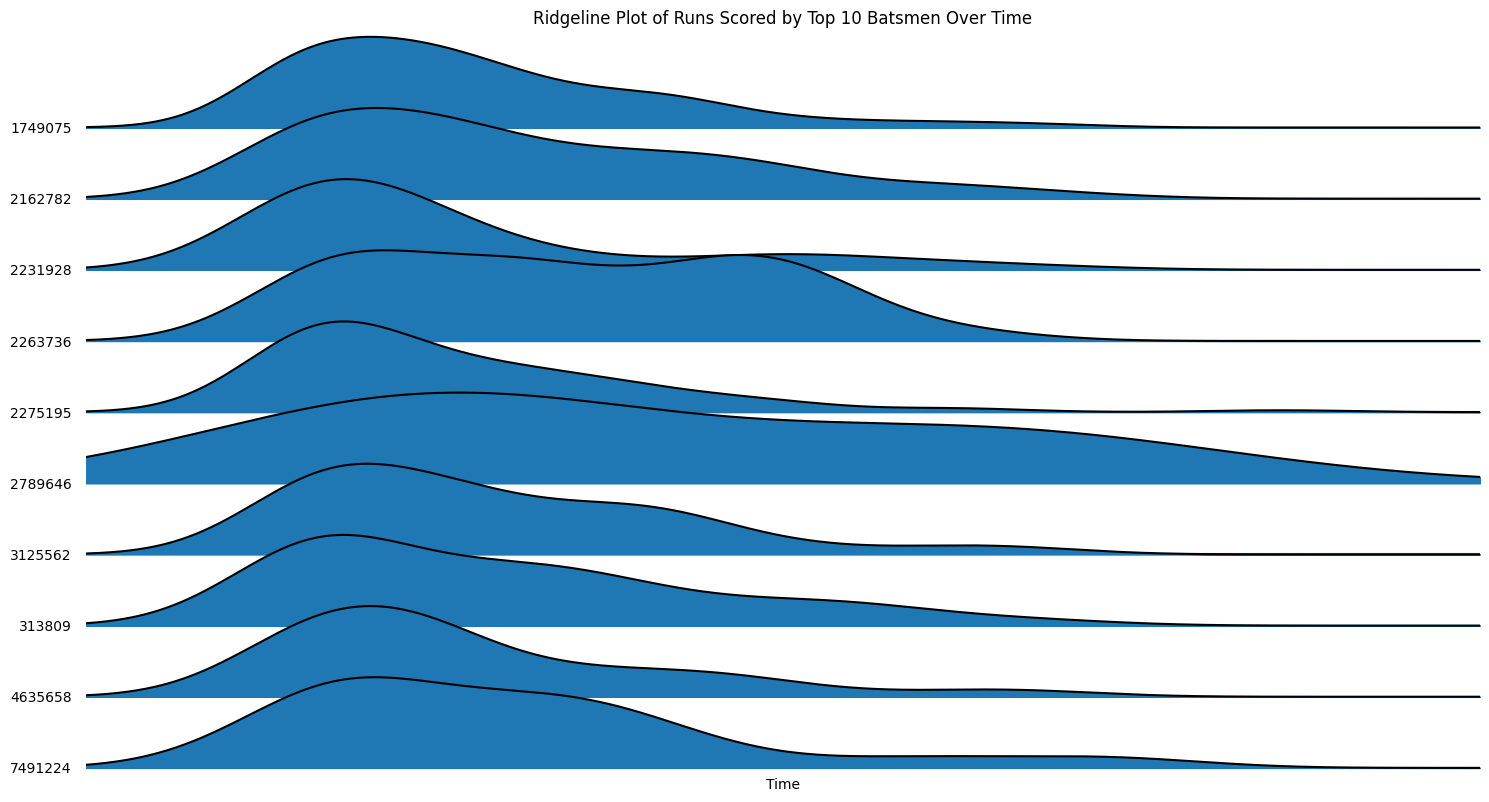

In [ ]:
# Ensure dates are parsed correctly
top_batsman_time_series['match_dt'] = pd.to_datetime(top_batsman_time_series['match_dt'])

# Verify date range
print("Date Range:", top_batsman_time_series['match_dt'].min(), top_batsman_time_series['match_dt'].max())

# Prepare data for joyplot
joy_data = []
for batsman_id in top_ten_batsmen['batsman_id']:
    batsman_data = top_batsman_time_series[top_batsman_time_series['batsman_id'] == batsman_id]
    batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
    joy_data.append(batsman_data[['match_dt', 'runs', 'batsman_id']])

# Concatenate all batsman data
joy_data = pd.concat(joy_data)

# Inspect the data
print(joy_data.head())

# Plotting
plt.figure(figsize=(12, 8))
joypy.joyplot(joy_data, by="batsman_id", column="runs", ylim='own', figsize=(15, 8), overlap=0.5)
plt.xlabel("Time")
plt.ylabel("Top 10 Batsmen ID")
plt.title("Ridgeline Plot of Runs Scored by Top 10 Batsmen Over Time")
plt.xticks([])  # Remove x-tick labels
plt.show()

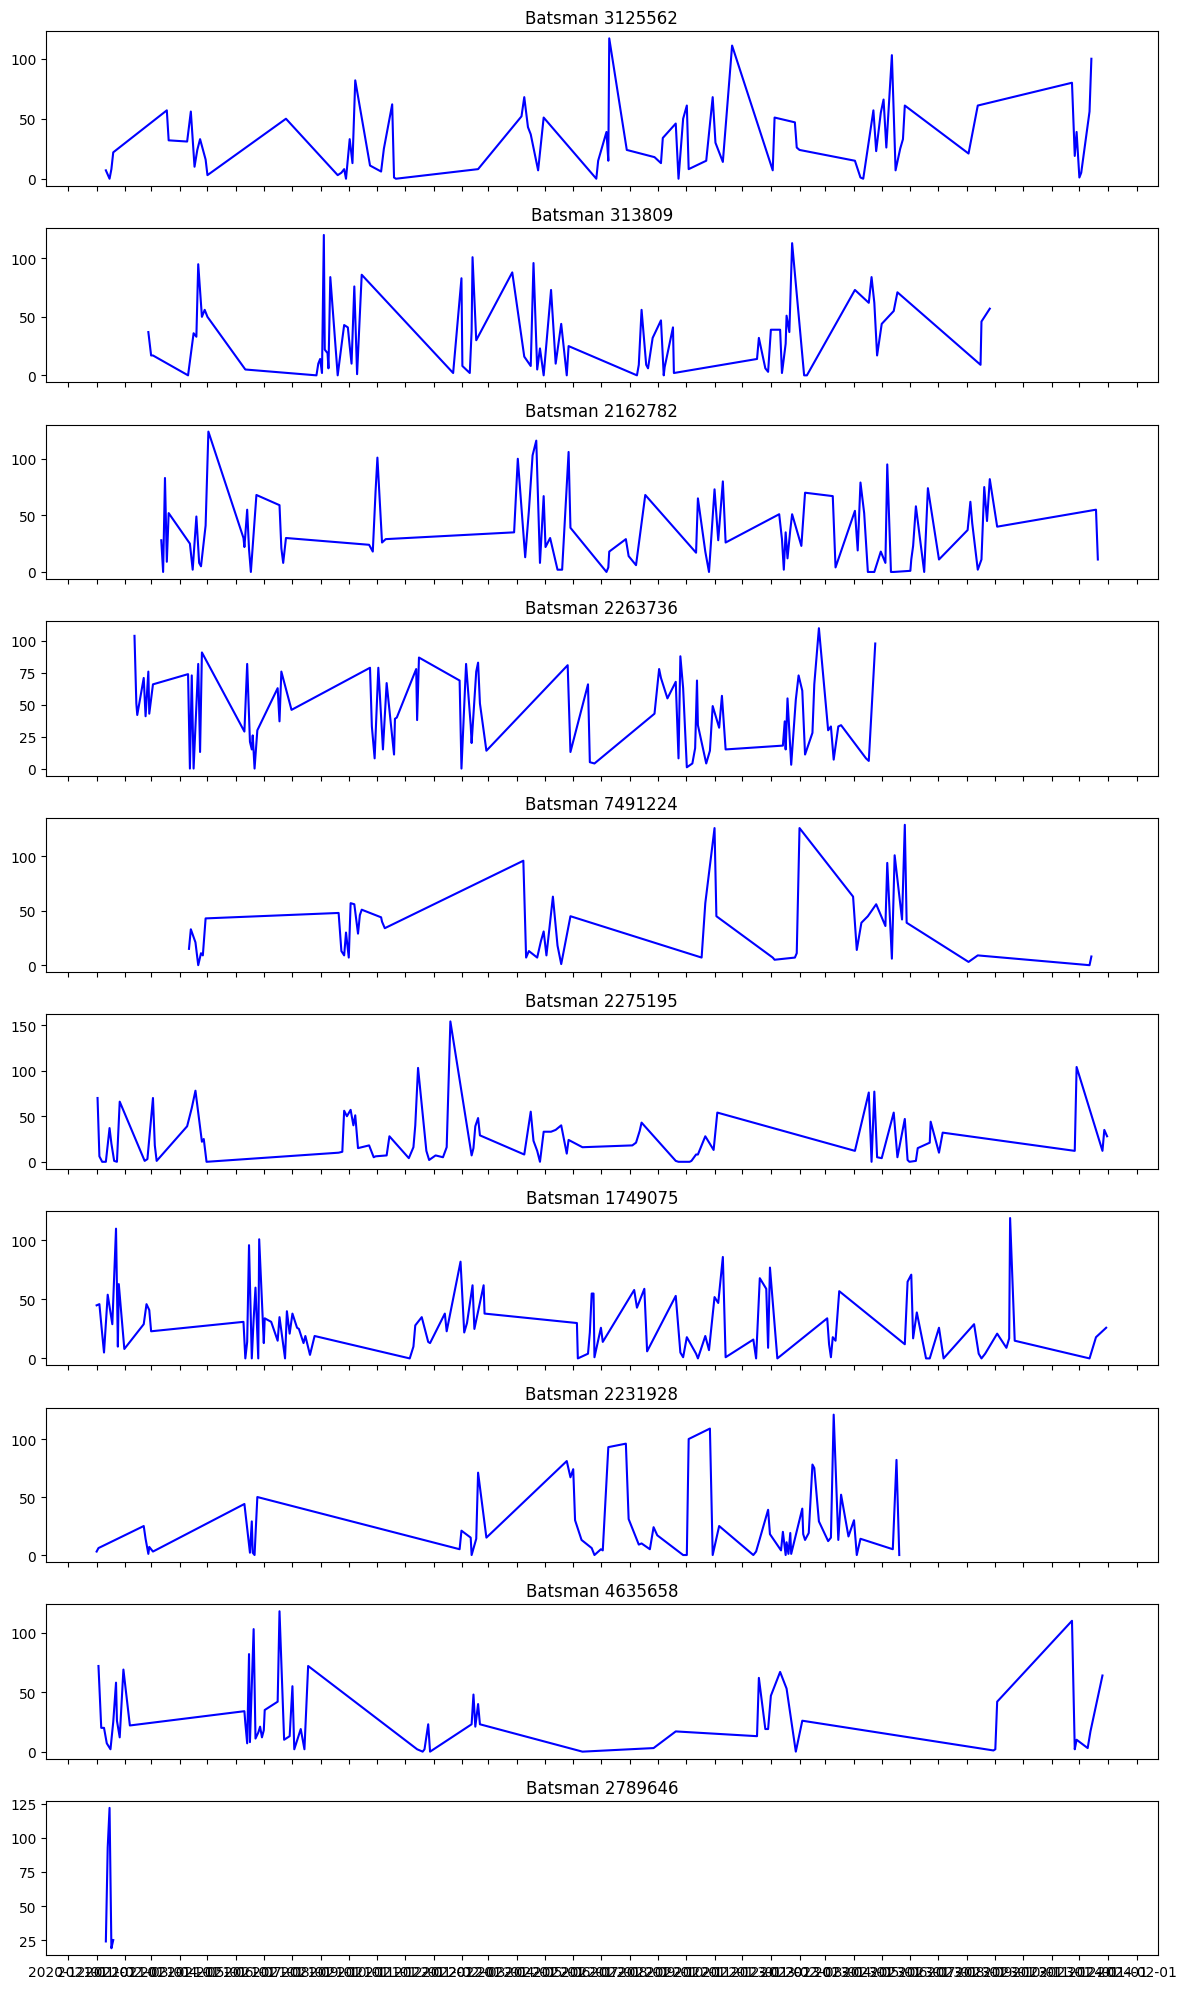

In [ ]:
import matplotlib.dates as mdates

# Create a sparkline for each batsman
fig, axes = plt.subplots(len(top_ten_batsmen), 1, figsize=(12, 2 * len(top_ten_batsmen)), sharex=True)

for ax, batsman_id in zip(axes, top_ten_batsmen['batsman_id']):
    batsman_data = top_batsman_time_series[top_batsman_time_series['batsman_id'] == batsman_id]
    ax.plot(batsman_data['match_dt'], batsman_data['runs'], color='blue')
    ax.set_title(f'Batsman {batsman_id}')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()


Date Range: 2021-01-01 00:00:00 2023-12-31 00:00:00
     match_dt  runs batsman_id
14 2021-01-11     7    3125562
20 2021-01-15     0    3125562
24 2021-01-17     8    3125562
27 2021-01-19    22    3125562
70 2021-03-18    57    3125562


/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/2763953819.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/2763953819.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
/var/folders/_v/fl3hl_f91sj6c7hlms42d3hc0000gn/T/ipykernel_39288/2763953819.py:15: SettingWithCopyWarn

<Figure size 1200x800 with 0 Axes>

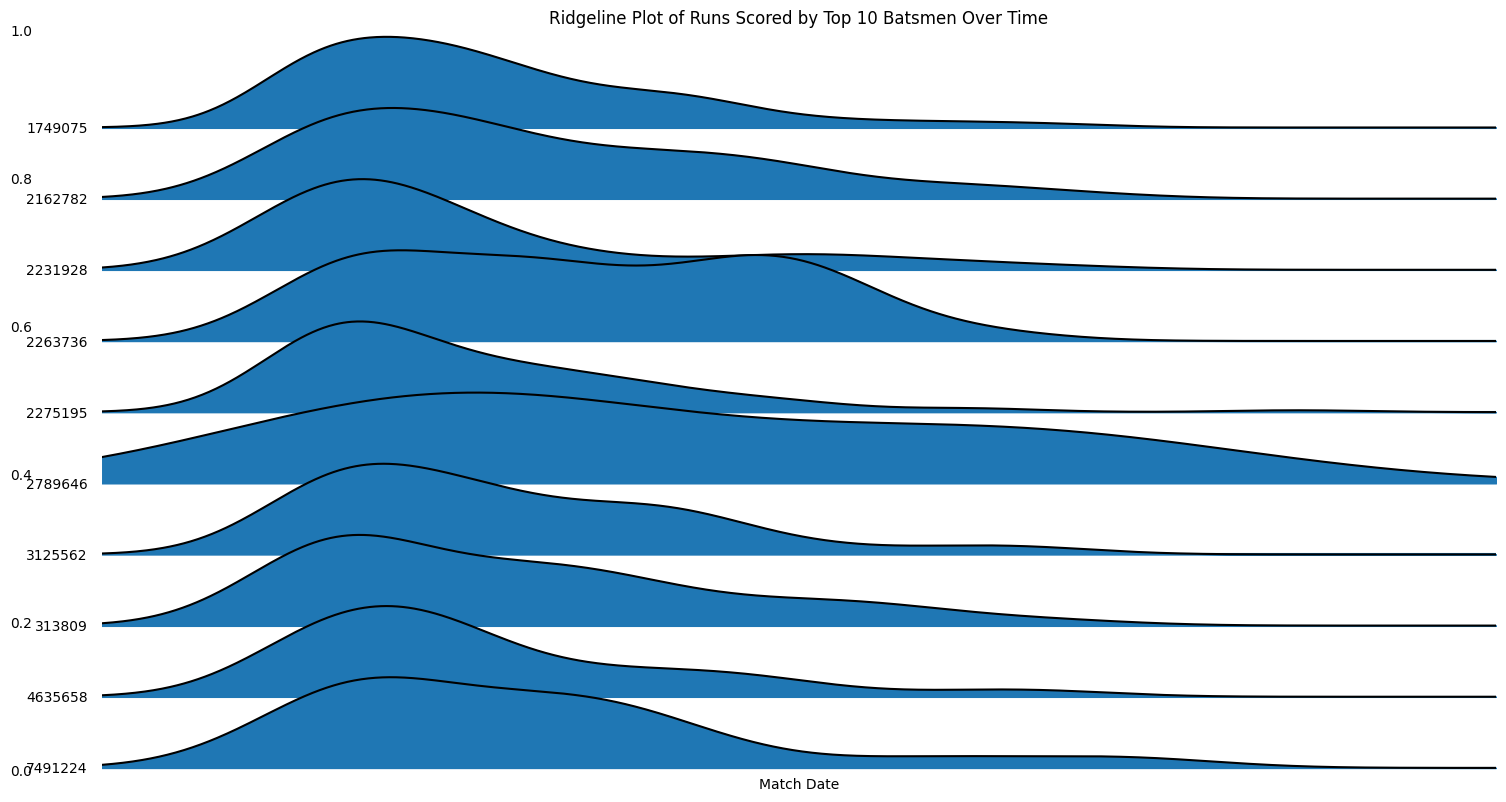

In [ ]:
import pandas as pd
import joypy
import matplotlib.pyplot as plt

# Ensure dates are parsed correctly
top_batsman_time_series['match_dt'] = pd.to_datetime(top_batsman_time_series['match_dt'])

# Verify date range
print("Date Range:", top_batsman_time_series['match_dt'].min(), top_batsman_time_series['match_dt'].max())

# Prepare data for joyplot
joy_data = []
for batsman_id in top_ten_batsmen['batsman_id']:
    batsman_data = top_batsman_time_series[top_batsman_time_series['batsman_id'] == batsman_id]
    batsman_data['batsman_id'] = str(batsman_id)  # Convert to string for joypy
    joy_data.append(batsman_data[['match_dt', 'runs', 'batsman_id']])

# Concatenate all batsman data
joy_data = pd.concat(joy_data)

# Inspect the data
print(joy_data.head())

# Plotting
plt.figure(figsize=(12, 8))
fig, axes = joypy.joyplot(joy_data, by="batsman_id", column="runs", ylim='own', figsize=(15, 8), overlap=0.5)
plt.xlabel("Match Date")
plt.title("Ridgeline Plot of Runs Scored by Top 10 Batsmen Over Time")
plt.xticks([])  # Remove x-tick labels

# Highlight specific IDs
highlight_ids = ['313809', '7491224', '2162782', '3125562']
highlight_color = 'yellow'
default_color = 'black'

# Get current y-tick labels and their positions
yticks = axes[-1].get_yticks()
ytick_labels = [item.get_text() for item in axes[-1].get_yticklabels()]

# Set new y-tick labels with highlights
for label in ytick_labels:
    if label in highlight_ids:
        axes[-1].text(-0.05, yticks[ytick_labels.index(label)], label, color=highlight_color,
                      ha='right', va='center', transform=axes[-1].get_yaxis_transform())
    else:
        axes[-1].text(-0.05, yticks[ytick_labels.index(label)], label, color=default_color,
                      ha='right', va='center', transform=axes[-1].get_yaxis_transform())

# Remove the default y-tick labels to avoid duplication
axes[-1].set_yticklabels([])

# Show the plot
plt.show()


In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='final_score', y='batsman_id', data=top_ten_batsmen, palette='viridis')
plt.xlabel('Final Score')
plt.ylabel('Batsman ID')
plt.title('Top 10 Batsmen by Final Score')
plt.show()


ValueError: Could not interpret input 'final_score'

<Figure size 1000x600 with 0 Axes>

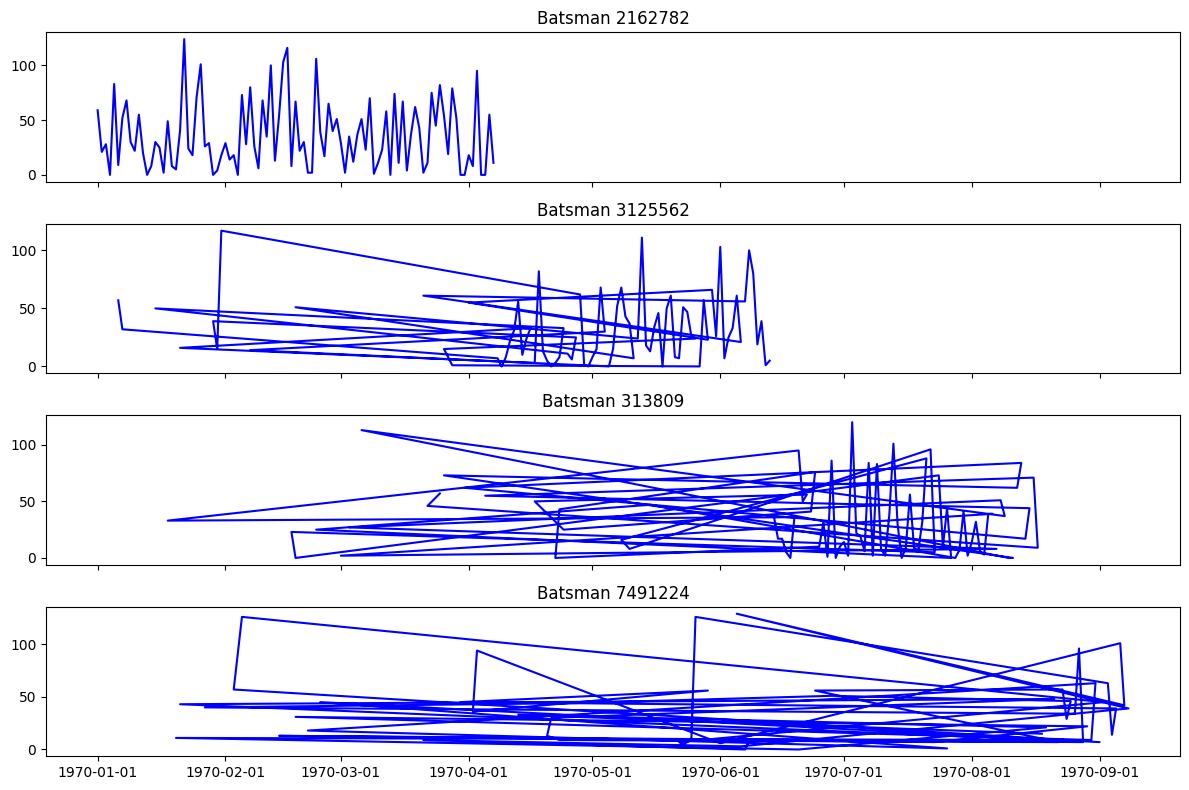

In [62]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Filter for the top 10 batsmen
top_batsman_time_series = df[df['batsman_id'].isin([313809, 7491224, 2162782, 3125562])]

# Create a sparkline for each batsman
fig, axes = plt.subplots(len(top_batsman_time_series['batsman_id'].unique()), 1, figsize=(12, 8), sharex=True)

for ax, batsman_id in zip(axes, top_batsman_time_series['batsman_id'].unique()):
    batsman_data = top_batsman_time_series[top_batsman_time_series['batsman_id'] == batsman_id]
    ax.plot(batsman_data['match_dt'], batsman_data['runs'], color='blue')
    ax.set_title(f'Batsman {batsman_id}')
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    ax.xaxis.set_major_locator(mdates.MonthLocator())

plt.tight_layout()
plt.show()
